# EECS531 - A3
## Tristan Maidment (tdm47)

#### Goal
The goal of this assignment is to compare the performance of network depth to verification set performance.  For this experiment, we will be comparing the a "shallow" or standard CNN, with one just convolutional and output layer to a deep CNN.

In A2, we learned about PCA as a powerful method for resembling images.  The last exercise included an implementation of the technique, and I will attempt to compare it's performance in comparison to CNNs.

In [1]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Implementation
For this project, we will be using the popular MNIST dataset.

In [2]:
from keras.datasets import mnist

epochs = 15
simple_score, deep_score, pca_score = np.zeros(epochs), np.zeros(epochs), np.zeros(epochs)

(imgTrain, labelTrain), (imgTest, labelTest) = mnist.load_data()

In [3]:
from keras import backend as K

imgRows, imgCols = 28, 28

if K.image_data_format() == 'channels_first':
    imgTrain = imgTrain.reshape(imgTrain.shape[0], 1, imgRows, imgCols)
    imgTest  = imgTest.reshape(imgTest.shape[0], 1, imgRows, imgCols)
    smpSize  = (1, imgRows, imgCols)
else:
    imgTrain = imgTrain.reshape(imgTrain.shape[0], imgRows, imgCols, 1)
    imgTest  = imgTest.reshape(imgTest.shape[0], imgRows, imgCols, 1)
    smpSize  = (imgRows, imgCols, 1)

imgTrain = imgTrain.astype('float') / 255
imgTest  = imgTest.astype('float') / 255

print('Training set in shape of ', imgTrain.shape, ' with element type ', type(imgTrain.item(0)))
print('Testing set in shape of  ', imgTest.shape, ' with element type ', type(imgTrain.item(0)))

Training set in shape of  (60000, 28, 28, 1)  with element type  <class 'float'>
Testing set in shape of   (10000, 28, 28, 1)  with element type  <class 'float'>


In [4]:
ncat = 10 
onehotTrain = keras.utils.to_categorical(labelTrain, ncat)
onehotTest  = keras.utils.to_categorical(labelTest, ncat)

#### Simple CNN
The first model that we will be testing is a simple CNN that uses a single convolutional layer, pooling layer, and dense layer.  For the models being tested, we will plot the validation set percentage for each epoch.

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=smpSize))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(ncat, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [6]:
for i in range(epochs):
    model.fit(imgTrain, onehotTrain, validation_data=(imgTest, onehotTest), batch_size=128, epochs=1, verbose=1)
    score = model.evaluate(imgTest, onehotTest, verbose=0)
    simple_score[i] = score[1]

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 21s 346us/step - loss: 0.3081 - acc: 0.9120 - val_loss: 0.1319 - val_acc: 0.9628
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 20s 339us/step - loss: 0.1074 - acc: 0.9703 - val_loss: 0.0783 - val_acc: 0.9771
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 22s 363us/step - loss: 0.0770 - acc: 0.9786 - val_loss: 0.0625 - val_acc: 0.9808
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 19s 325us/step - loss: 0.0637 - acc: 0.9812 - val_loss: 0.0547 - val_acc: 0.9825
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 22s 368us/step - loss: 0.0557 - acc: 0.9839 - val_loss: 0.0513 - val_acc: 0.9842
Train on 60000 samples, validate on 10000 samples
Epoch 1/1


#### Deep CNN
This CNN is resembles a more traditional approach to a deep learning CNN.  It consists of two convolutional layers, a max pooling layer, two more convolutional layers, a second max pooling layer, then two dense layers.  The convolutional layers consist of kernels of both increaseing amount and size.  The purpose of this identify smaller features first, with the small kernels.  These small features are then classified using the larger kernels, which should capture some of the bigger features of the image.  I believe that this should reduce the variance that results from the various ways which people write digits.

In [7]:
model2 = Sequential()

model2.add(Conv2D(4, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=smpSize))
model2.add(Conv2D(8, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=smpSize))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=smpSize))
model2.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=smpSize))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='sigmoid'))
model2.add(Dense(ncat, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
for i in range(epochs):
    model2.fit(imgTrain, onehotTrain, validation_data=(imgTest, onehotTest), batch_size=128, epochs=1, verbose=1)
    score = model2.evaluate(imgTest, onehotTest, verbose=0)
    deep_score[i] = score[1]

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 27s 455us/step - loss: 0.2858 - acc: 0.9120 - val_loss: 0.0841 - val_acc: 0.9738
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 30s 492us/step - loss: 0.0715 - acc: 0.9787 - val_loss: 0.0539 - val_acc: 0.9836
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 25s 410us/step - loss: 0.0501 - acc: 0.9846 - val_loss: 0.0432 - val_acc: 0.9864
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 27s 451us/step - loss: 0.0383 - acc: 0.9887 - val_loss: 0.0377 - val_acc: 0.9884
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 31s 511us/step - loss: 0.0298 - acc: 0.9914 - val_loss: 0.0369 - val_acc: 0.9879
Train on 60000 samples, validate on 10000 samples
Epoch 1/1


#### PCA
For the purpose of this problem, we will not be using a CNN, but rather a more traditional neural network.  The reason for this choice is due to the fact that data representation of PCA works very well as a vector input to the input layer.  To make this example work, we will fit and transform the test set.  Using the test set's fit, the verification set is transformed as well.  This means that the verification set will be represented using the principle parts of the training set.  Although the representation of the verification space is not perfect, it should, in theory, be a viable way to represent the space.

In [9]:
model3 = Sequential()

model3.add(Dense(400, input_shape=(784,)))
model3.add(Dense(300, activation='sigmoid'))
model3.add(Dense(200, activation='sigmoid'))
model3.add(Dense(100, activation='sigmoid'))
model3.add(Dense(ncat, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
n, h, w, channel = imgTrain.shape
X = np.reshape(imgTrain,(n, h*w*channel))
pca = PCA() 
imgTrain_pca = pca.fit_transform(X)
n_test = imgTest.shape[0]
X_test = np.reshape(imgTest,(n_test, h*w*channel))
imgTest_pca = pca.transform(X_test)

In [11]:
for i in range(epochs):
    model3.fit(imgTrain_pca, onehotTrain, validation_data=(imgTest_pca, onehotTest), batch_size=128, epochs=1, verbose=1)
    score = model3.evaluate(imgTest_pca, onehotTest, verbose=0)
    pca_score[i] = score[1]

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 6s 106us/step - loss: 0.8975 - acc: 0.7242 - val_loss: 0.3694 - val_acc: 0.8907
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 6s 99us/step - loss: 0.3210 - acc: 0.9059 - val_loss: 0.2839 - val_acc: 0.9176
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 6s 104us/step - loss: 0.2499 - acc: 0.9252 - val_loss: 0.2324 - val_acc: 0.9310
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 6s 100us/step - loss: 0.2016 - acc: 0.9396 - val_loss: 0.1899 - val_acc: 0.9440
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 6s 99us/step - loss: 0.1645 - acc: 0.9510 - val_loss: 0.1643 - val_acc: 0.9502
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/6

#### Conclusion
By plotting the change in performance of the three models, over the span of 15 epochs, we can see the ability for each method to classify the verification set.  As we can see, the convolution networks have a very high rate of success in the validation within the first few epochs.  PCA, however, does not benefit in this way.  However, the rate at which it learns to classify the verification set increase much faster.  But fails to reach the starting rate of the deep CNN after 15 epochs.  

One thing to note is that the time per epoch for PCA on my machine is only 6-7 seconds.  The time required per epoch for the Deep CNN is closer to 30 seconds.  This indicates that we can perform as many has 5 times the amount of epochs in the same amount of time with the PCA method.  Although this will initially provide a classification rate for the verification set, it will start to overtrain quickly. Fortunately, there are various methods, such as dropout layers, that prevent this from occuring.

Overall, there are nearly infinite ways to formulate a model for any given classification problem.  In this example, we tested three fairly different methods, all of which provided very good performance on the verification set.

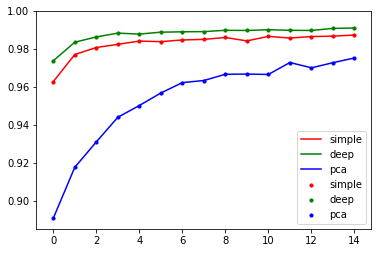

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(epochs), simple_score, s=10, c='r', label='simple')
ax1.scatter(range(epochs), deep_score, s=10, c='g', label='deep')
ax1.scatter(range(epochs), pca_score, s=10, c='b', label='pca')
ax1.plot(range(epochs), simple_score, c='r', label='simple')
ax1.plot(range(epochs), deep_score, c='g', label='deep')
ax1.plot(range(epochs), pca_score, c='b', label='pca')
plt.legend(loc='lower right');
plt.show()